In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

from neuropacks import ECOG
from pyuoi.decomposition import UoI_NMF
from scipy.optimize import nnls
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize 

from utils import *
%matplotlib inline

In [24]:
# parameters
n_samples, n_features, true_rank = 1000, 50, 4
noise = 0.50

# initialize problem
W_true = np.random.uniform(low=0, high=3., size=(n_samples, true_rank))
H_true = np.random.uniform(low=0, high=3., size=(true_rank, n_features))
X = np.dot(W_true, H_true) + noise * np.random.rand(n_samples, n_features)

In [25]:
reps = 10
ranks = np.arange(1, 8)
error = np.zeros(ranks.size)

In [26]:
nmf = NMF(
    beta_loss='kullback-leibler',
    solver='mu',
    max_iter=1000,
    init='random')

In [27]:
k_hat, errors = bi_cross_validator(X, nmf, ranks=ranks)

0
1
2
3
4
5
6
7
8
9


4


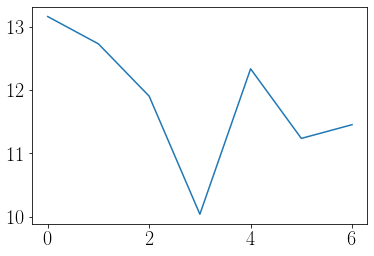

In [28]:
print(k_hat)
plt.plot(np.log(errors))

In [7]:
data_path = '/Users/psachdeva/data/ecog/r32_b7.mat'
grid_path = '/Users/psachdeva/data/ecog/grdid.mat'
ecog = ECOG(
    data_path=data_path,
    grid_path=grid_path
)

In [8]:
Y = ecog.get_response_matrix(
    bounds=(40, 60),
    band='HG'
)

In [10]:
# kill the dead indices
dead_indices = [19, 21, 0]
Y[:, dead_indices] = 0
Y = Y + np.abs(np.min(Y, axis=0, keepdims=True))

In [11]:
ranks = np.arange(1, 41)
k_hat, errors = bi_cross_validator(Y, nmf, ranks=ranks)

0
1
2
3
4
5
6
7
8
9


In [12]:
k_hat

28

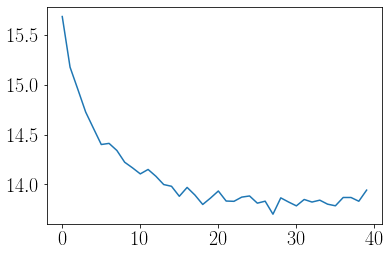

In [13]:
plt.plot(np.log(errors))

In [14]:
nmf.set_params(n_components=28)
nmf.fit(Y)

NMF(alpha=0.0, beta_loss='kullback-leibler', init='random', l1_ratio=0.0,
    max_iter=1000, n_components=28, random_state=None, shuffle=False,
    solver='mu', tol=0.0001, verbose=0)

(<Figure size 1152x2160 with 30 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c231c5cf8>,
       dtype=object))

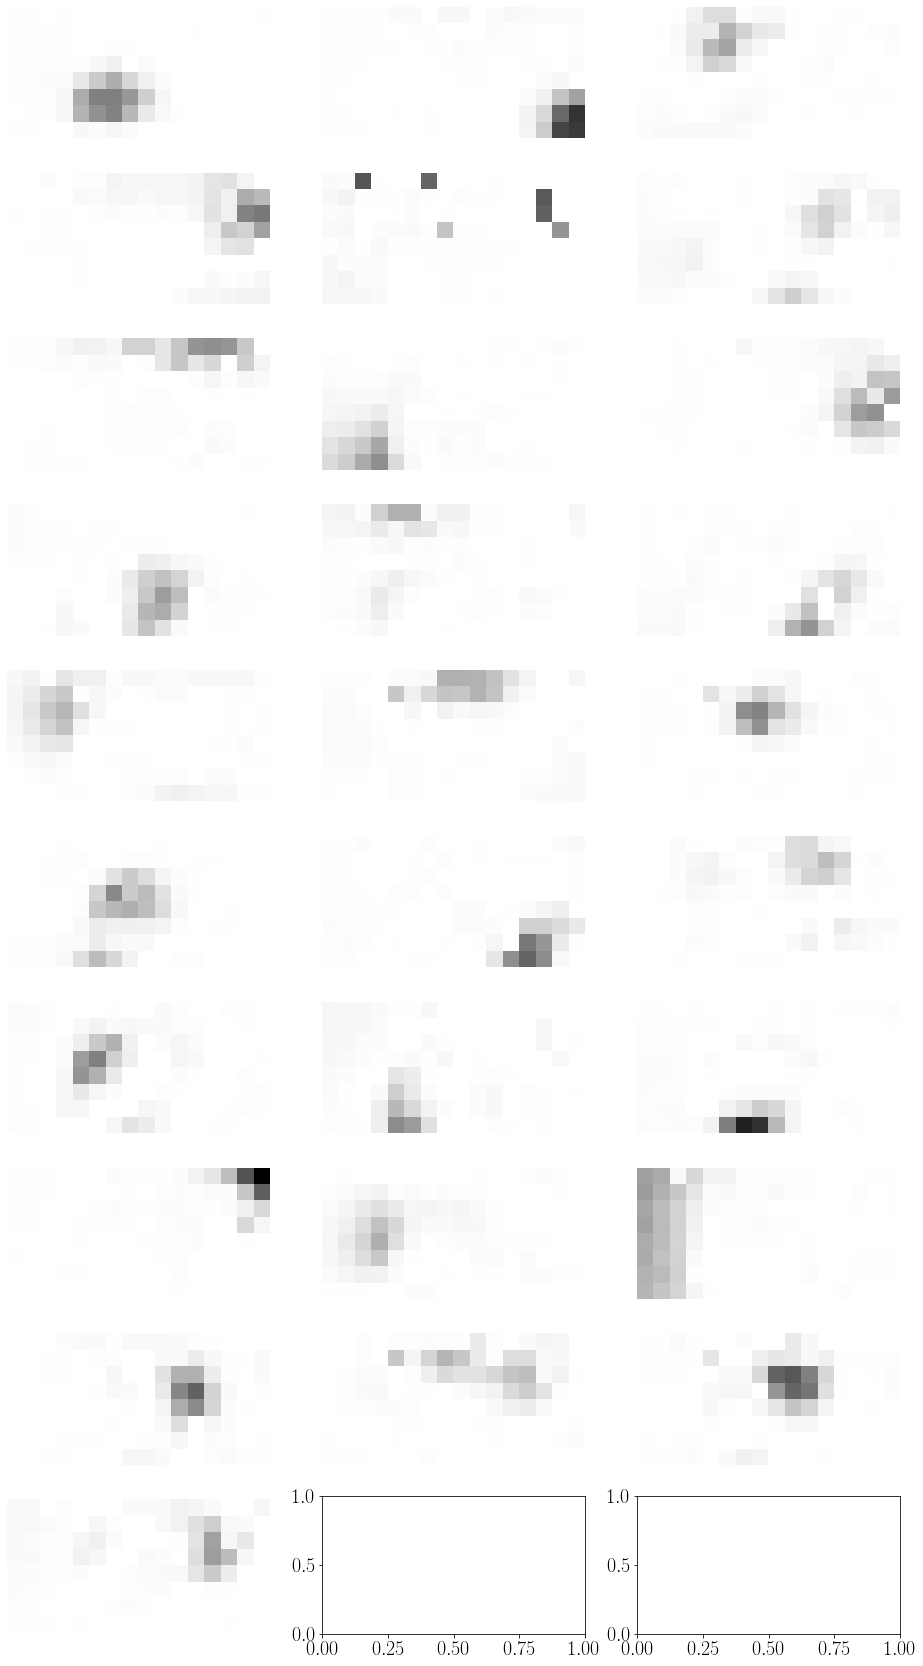

In [16]:
plot_ecog_bases(nmf.components_, ecog, vmax=np.max(nmf.components_))